In [764]:
# here we compare a bunch of different q=1 non-spinning simulations, approximants and models
# to study the predictions for the relative phase difference
# between the 32 and 22 mode

In [765]:
import matplotlib.pyplot as plt

In [766]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS
import numpy as np

# load long q1 from SXS

In [767]:
import sxs

In [768]:
# q1:
# location = "SXS:BBH:1154/Lev/rhOverM"
# q2:
location = "SXS:BBH:1167/Lev/rhOverM"

waveform = sxs.load(location)
for key, w_i in waveform.items():
    if key != 'VersionHist.ver':
        w_i.time = w_i.time - w_i.max_norm_time()

Found the following files to load from the SXS catalog:
    SXS:BBH:1167v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5


/opt/homebrew/Caskroom/miniforge/base/envs/lmfit/lib/python3.10/site-packages/sxs/waveforms/nrar.py:176: UserWarning: 
Could not find root group as `h5_group` or as `extrapolation_order`; returning all groups
  warnings.warn(warning)


(-1000.0, 100.0)

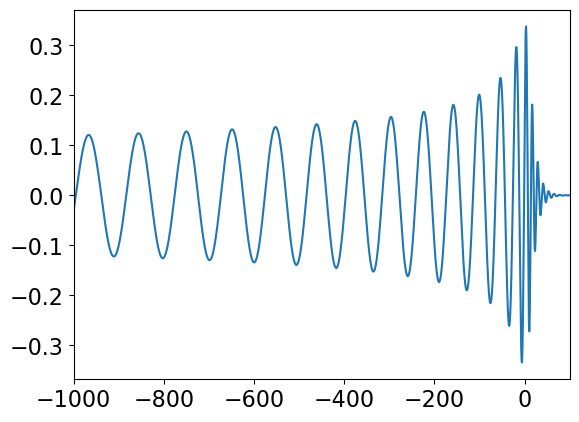

In [769]:
plt.figure()
plt.plot(waveform['Extrapolated_N2.dir'].t, waveform['Extrapolated_N2.dir'][:,4].real)
plt.xlim(-1000, 100)

In [770]:
from spherical_functions import LM_index

In [771]:
LM_index(2, 2, 2)

4

In [772]:
modes = [(2,2),(2,1),(3,3),(3,2),(4,4),(4,3)]

In [773]:
wf_sxs = {}
wf_sxs['t'] = waveform['Extrapolated_N2.dir'].t
wf_sxs['hlm'] = {}
for mode in modes:
    l = mode[0]
    m = mode[1]
    index = LM_index(l, m, 2)
    wf_sxs['hlm'][mode] = waveform['Extrapolated_N2.dir'].data[:,index]

In [774]:
wf_sxs

{'t': array([-15904.83784166, -15903.39542146, -15901.95300127, ...,
           181.5848488 ,    181.68484692,    181.78484505]),
 'hlm': {(2,
   2): array([ 1.66564628e-04+4.67541048e-04j,  1.48767076e-04+4.44871382e-04j,
          1.27276048e-04+3.52172610e-04j, ...,
         -3.58415003e-06-3.00641496e-06j, -3.56876344e-06-3.03631931e-06j,
         -3.55519093e-06-3.06684029e-06j]),
  (2,
   1): array([-1.82268546e-04+2.20965013e-04j, -1.28277054e-04+4.00931731e-04j,
         -2.45364110e-04+6.52299032e-04j, ...,
          3.63764756e-09-4.70601613e-09j,  4.27836540e-09-4.57992558e-09j,
          4.93074996e-09-4.49104494e-09j]),
  (3,
   3): array([ 6.72858414e-05+4.59775194e-04j,  1.09471769e-04+4.45835561e-04j,
          1.65228995e-04+4.34725427e-04j, ...,
         -7.79102882e-07+5.81310100e-07j, -7.58406516e-07+5.84416551e-07j,
         -7.37564768e-07+5.86228564e-07j]),
  (3,
   2): array([-3.89990228e-04-1.44941557e-04j, -3.11847332e-04+1.56988406e-04j,
         -5.41135093e

In [775]:
wf_sxs.keys()

dict_keys(['t', 'hlm'])

# load other w/ LAL

In [776]:
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")


In [777]:
import os
# download HybSur data file: https://git.ligo.org/lscsoft/lalsuite-extra/-/blob/master/data/lalsimulation/NRHybSur3dq8_lal.h5
# set path
os.environ['LAL_DATA_PATH'] = '/Users/sebastian.khan/Downloads/'

In [778]:
import matplotlib.pyplot as plt
plt.figure()
plt.show()
plt.close()
plt.rcParams.update({'font.size':16})
import lalsimulation as lalsim
import phenom
import numpy as np

import waveform_generator
import hybrid_utils
import pn_taylor_eob

<Figure size 640x480 with 0 Axes>

In [779]:
# nr_hdf5_filename="/Users/sebastian.khan/personal/data/SXS_BBH_0180_Res4.h5" #q=1
nr_hdf5_filename="/Users/sebastian.khan/personal/data/SXS_BBH_0169_Res3.h5" #q=2
# nr_hdf5_filename="/Users/sebastian.khan/personal/data/SXS_BBH_0167_Res5.h5" #q=4
# nr_hdf5_filename="/Users/sebastian.khan/personal/data/SXS_BBH_0107_Res5.h5" #q=5
# nr_hdf5_filename="/Users/sebastian.khan/personal/data/SXS_BBH_0063_Res5.h5" #q=8
# nr_hdf5_filename="/Users/sebastian.khan/personal/data/SXS_BBH_0303_Res3.h5" #q=10


# nr_hdf5_filename="/Users/sebastian.khan/Downloads/MAYA0909.h5"

# nr_hdf5_filename="/Users/sebastian.khan/Downloads/ExtrapStrain_RIT-BBH-0245-n120.h5"
# nr_hdf5_filename="/Users/sebastian.khan/Downloads/ExtrapStrain_RIT-BBH-0337-n120.h5"

# sample spacing in units of M for output NR time series
delta_t=0.1
wf_nr = waveform_generator.get_hdf5_strain(nr_hdf5_filename, modes, delta_t)

print(wf_nr['metadata'])

# should add a test is mass-ratio == 1 and spins are equal then don't include odd-m modes
# try:
#     np.testing.assert_approx_equal(wf_nr['metadata']['q'], 1)
#     modes = [(2,2),(3,2),(4,4)]
# except:
#     pass

# f_min=20
# f_min=16
f_min=13

wf_pn = waveform_generator.generate_pn_waveform(
    q=wf_nr['metadata']['q'],
    modes=modes,
    f_min=f_min,
    S1z=wf_nr['metadata']['spin1z']*0,
    S2z=wf_nr['metadata']['spin2z']*0,
    # approximant=lalsim.IMRPhenomTHM
    # approximant=lalsim.NRHybSur3dq8
    approximant=lalsim.TaylorT1
    # approximant=lalsim.SpinTaylorT1
    # approximant=lalsim.SEOBNRv4PHM
)

wf_sur = waveform_generator.generate_pn_waveform(
    q=wf_nr['metadata']['q'],
    modes=modes,
    f_min=f_min,
    S1z=wf_nr['metadata']['spin1z']*0,
    S2z=wf_nr['metadata']['spin2z']*0,
    approximant=lalsim.NRHybSur3dq8
)


# fake nr with another model
# wf_nr = waveform_generator.generate_pn_waveform(
#     q=wf_nr['metadata']['q'],
#     modes=modes,
#     # f_min=f_min+4,
#     f_min=20,
#     S1z=wf_nr['metadata']['spin1z'],
#     S2z=wf_nr['metadata']['spin2z'],
#     approximant=lalsim.IMRPhenomTHM
#     # approximant=lalsim.NRHybSur3dq8
#     # approximant=lalsim.SpinTaylorT4
# )




# # using EOB for 22 mode and PN amplitudes
# wf_pn = pn_taylor_eob.generate_pn_waveform_eob(
#     wf_nr['metadata']['q'],
#     modes=modes,
#     f_min=f_min,
#     S1z=wf_nr['metadata']['spin1z'],
#     S2z=wf_nr['metadata']['spin2z']
# )

{'q': 1.9999733299310347, 'filename': '/Users/sebastian.khan/personal/data/SXS_BBH_0169_Res3.h5', 'M': 0.9999989852, 'spin1z': 7.25872862782e-08, 'spin2z': -4.69907717671e-07}


# comparisons

In [780]:
mask = wf_sxs['t'] > wf_sxs['t'][0] * 0.9
wf_sxs['t'] = wf_sxs['t'][mask]
for mode in modes:
    wf_sxs['hlm'][mode] = wf_sxs['hlm'][mode][mask]

In [781]:
wf_sxs = hybrid_utils.compute_amplitude(wf_sxs)
wf_nr = hybrid_utils.compute_amplitude(wf_nr)
wf_pn = hybrid_utils.compute_amplitude(wf_pn)
wf_sur = hybrid_utils.compute_amplitude(wf_sur)

wf_sxs = hybrid_utils.compute_phase(wf_sxs)
wf_nr = hybrid_utils.compute_phase(wf_nr)
wf_pn = hybrid_utils.compute_phase(wf_pn)
wf_sur = hybrid_utils.compute_phase(wf_sur)

wf_sxs = hybrid_utils.compute_frequency(wf_sxs)
wf_nr = hybrid_utils.compute_frequency(wf_nr)
wf_pn = hybrid_utils.compute_frequency(wf_pn)
wf_sur = hybrid_utils.compute_frequency(wf_sur)

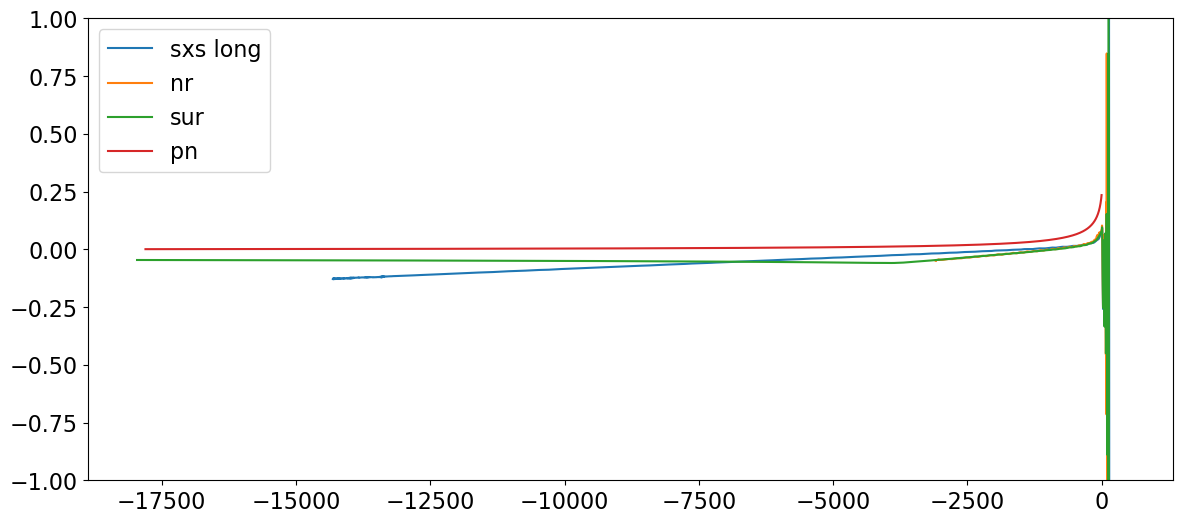

In [782]:
plt.figure(figsize=(14, 6))

z = wf_sxs['phase'][3,2] - wf_sxs['phase'][2,2]
plt.plot(wf_sxs['t'], z, label='sxs long')

z = wf_nr['phase'][3,2] - wf_nr['phase'][2,2]
plt.plot(wf_nr['t'], z, label='nr')

z = wf_sur['phase'][3,2] - wf_sur['phase'][2,2]
plt.plot(wf_sur['t'], z, label='sur')

z = wf_pn['phase'][3,2] - wf_pn['phase'][2,2]
plt.plot(wf_pn['t'], z, label='pn')

# plt.xlim(-1000,200)
# plt.ylim(-0.2, 0.2)
plt.ylim(-1,1)
plt.legend()

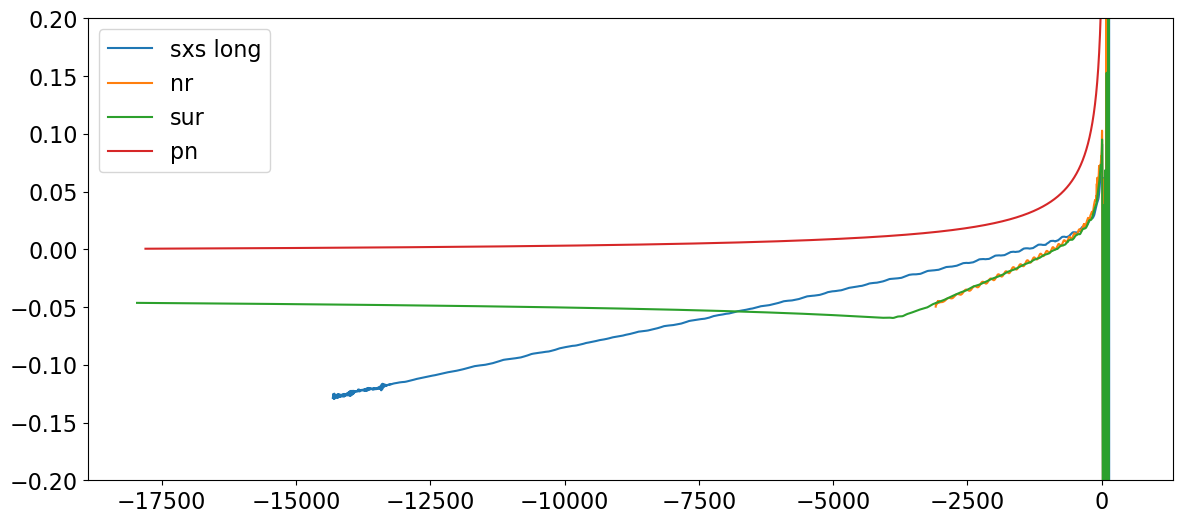

In [783]:
plt.figure(figsize=(14, 6))

z = wf_sxs['phase'][3,2] - wf_sxs['phase'][2,2]
plt.plot(wf_sxs['t'], z, label='sxs long')

z = wf_nr['phase'][3,2] - wf_nr['phase'][2,2]
plt.plot(wf_nr['t'], z, label='nr')

z = wf_sur['phase'][3,2] - wf_sur['phase'][2,2]
plt.plot(wf_sur['t'], z, label='sur')

z = wf_pn['phase'][3,2] - wf_pn['phase'][2,2]
plt.plot(wf_pn['t'], z, label='pn')

# plt.xlim(-1000,200)
plt.ylim(-0.2, 0.2)
# plt.ylim(-1,1)
plt.legend()

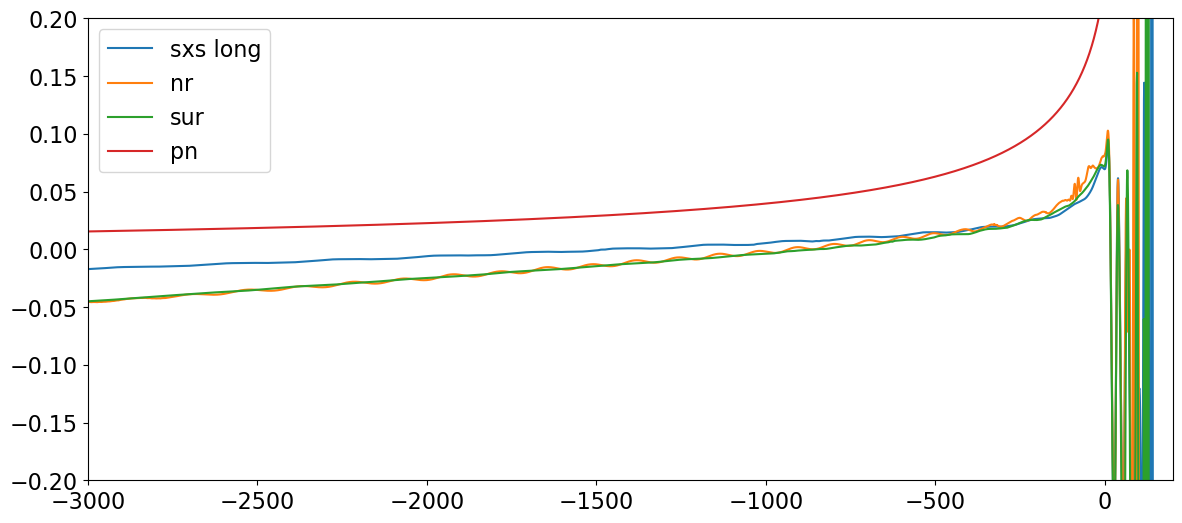

In [784]:
plt.figure(figsize=(14, 6))

z = wf_sxs['phase'][3,2] - wf_sxs['phase'][2,2]
plt.plot(wf_sxs['t'], z, label='sxs long')

z = wf_nr['phase'][3,2] - wf_nr['phase'][2,2]
plt.plot(wf_nr['t'], z, label='nr')

z = wf_sur['phase'][3,2] - wf_sur['phase'][2,2]
plt.plot(wf_sur['t'], z, label='sur')

z = wf_pn['phase'][3,2] - wf_pn['phase'][2,2]
plt.plot(wf_pn['t'], z, label='pn')

plt.xlim(-3000,200)
plt.ylim(-0.2, 0.2)
# plt.ylim(-1,1)
plt.legend()

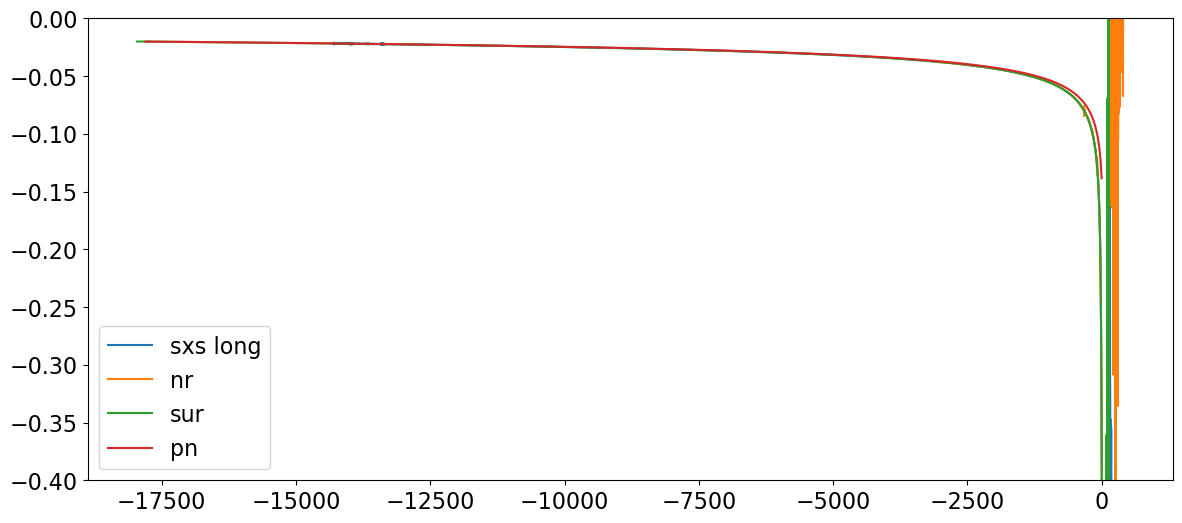

In [785]:
plt.figure(figsize=(14, 6))

z = wf_sxs['freq'][3,2]# - wf_sxs['freq'][2,2]
plt.plot(wf_sxs['t'], z, label='sxs long')

z = wf_nr['freq'][3,2]# - wf_nr['freq'][2,2]
plt.plot(wf_nr['t'], z, label='nr')

z = wf_sur['freq'][3,2]# - wf_sur['freq'][2,2]
plt.plot(wf_sur['t'], z, label='sur')

z = wf_pn['freq'][3,2]# - wf_pn['freq'][2,2]
plt.plot(wf_pn['t'], z, label='pn')

# plt.xlim(-1000,200)
plt.ylim(-0.4, 0.)
# plt.ylim(-1,1)
plt.legend()

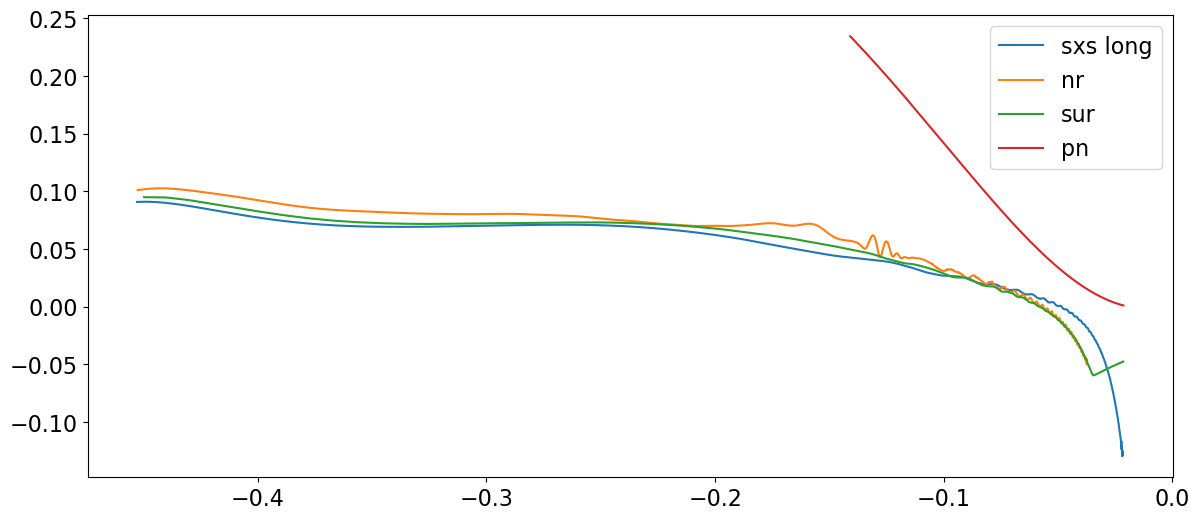

In [786]:
plt.figure(figsize=(14, 6))


x = wf_sxs['freq'][2,2]
z = wf_sxs['phase'][3,2] - wf_sxs['phase'][2,2]
mask = (wf_sxs['t']>-15000) & (wf_sxs['t']<10)
plt.plot(x[mask], z[mask], label='sxs long')

x = wf_nr['freq'][2,2]
z = wf_nr['phase'][3,2] - wf_nr['phase'][2,2]
mask = (wf_nr['t']>-15000) & (wf_nr['t']<10)
plt.plot(x[mask], z[mask], label='nr')

x = wf_sur['freq'][2,2]
z = wf_sur['phase'][3,2] - wf_sur['phase'][2,2]
mask = (wf_sur['t']>-15000) & (wf_sur['t']<10)
plt.plot(x[mask], z[mask], label='sur')

x = wf_pn['freq'][2,2]
z = wf_pn['phase'][3,2] - wf_pn['phase'][2,2]
mask = (wf_pn['t']>-15000) & (wf_pn['t']<10)
plt.plot(x[mask], z[mask], label='pn')

# plt.xlim(-0.2, 0.)
# plt.ylim(-0.2, 0.2)
# plt.ylim(-1,1)
plt.legend()

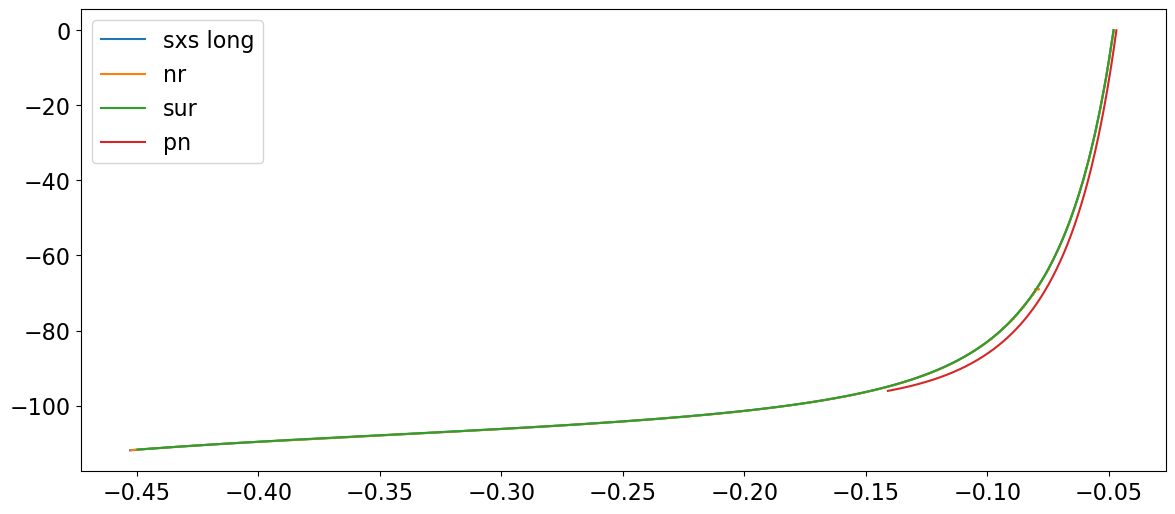

In [787]:
plt.figure(figsize=(14, 6))


x = wf_sxs['freq'][2,2]
z = wf_sxs['phase'][2,2]
mask = (wf_sxs['t']>-1500) & (wf_sxs['t']<10)
plt.plot(x[mask], z[mask] - z[mask][0], label='sxs long')

x = wf_nr['freq'][2,2]
z = wf_nr['phase'][2,2]
mask = (wf_nr['t']>-1500) & (wf_nr['t']<10)
plt.plot(x[mask], z[mask] - z[mask][0], label='nr')

x = wf_sur['freq'][2,2]
z = wf_sur['phase'][2,2]
mask = (wf_sur['t']>-1500) & (wf_sur['t']<10)
plt.plot(x[mask], z[mask] - z[mask][0], label='sur')

x = wf_pn['freq'][2,2]
z = wf_pn['phase'][2,2]
mask = (wf_pn['t']>-1500) & (wf_pn['t']<10)
plt.plot(x[mask], z[mask] - z[mask][0], label='pn')

# plt.xlim(-0.2, 0.)
# plt.ylim(-0.2, 0.2)
# plt.ylim(-1,1)
plt.legend()

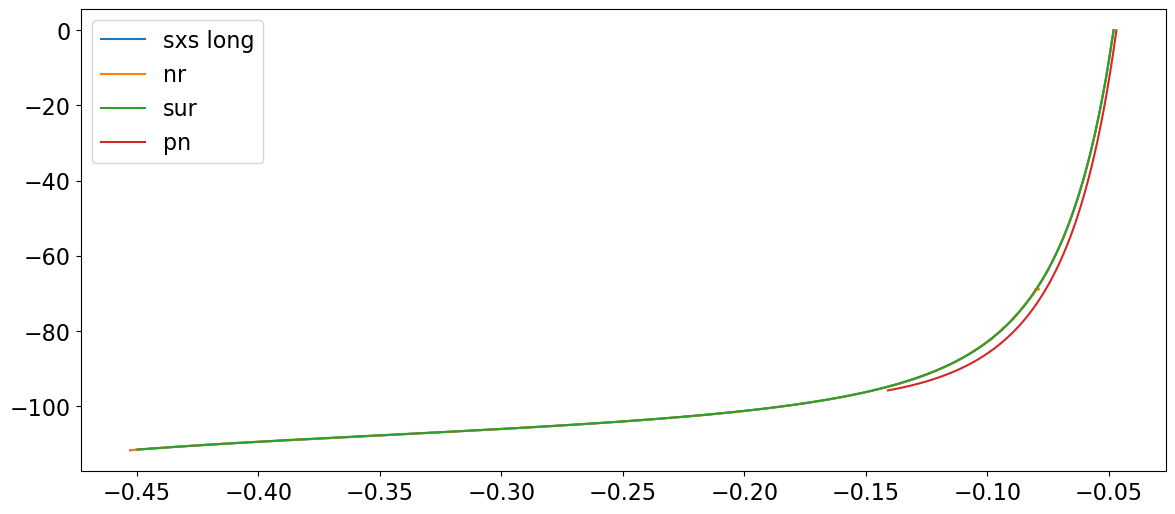

In [788]:
plt.figure(figsize=(14, 6))


x = wf_sxs['freq'][2,2]
z = wf_sxs['phase'][3,2]
mask = (wf_sxs['t']>-1500) & (wf_sxs['t']<10)
plt.plot(x[mask], z[mask] - z[mask][0], label='sxs long')

x = wf_nr['freq'][2,2]
z = wf_nr['phase'][3,2]
mask = (wf_nr['t']>-1500) & (wf_nr['t']<10)
plt.plot(x[mask], z[mask] - z[mask][0], label='nr')

x = wf_sur['freq'][2,2]
z = wf_sur['phase'][3,2]
mask = (wf_sur['t']>-1500) & (wf_sur['t']<10)
plt.plot(x[mask], z[mask] - z[mask][0], label='sur')

x = wf_pn['freq'][2,2]
z = wf_pn['phase'][3,2]
mask = (wf_pn['t']>-1500) & (wf_pn['t']<10)
plt.plot(x[mask], z[mask] - z[mask][0], label='pn')

# plt.xlim(-0.2, 0.)
# plt.ylim(-0.2, 0.2)
# plt.ylim(-1,1)
plt.legend()

# align phases

In [789]:
# if we use the long NR simulation as the 'truth' and then we align
# other waveform phases with repsect to this and the compute phi_32 - phi_22

In [790]:
wf_sxs['t']

array([-14314.23173959, -14312.81874649, -14311.40760834, ...,
          181.5848488 ,    181.68484692,    181.78484505])

In [791]:
wf_sxs['phase'][2,2]

array([   2.64162469,    2.61076164,    2.57994167, ..., -549.08075364,
       -549.07375356, -549.06692931])

In [792]:
def TwoPhaseModel(x, dt, dphi, dpsi, phase_nr_x=None, phase_nr_y=None):
    """
    This function is designed to be used with lmfit.
    It can fit multiple modes by concatenating them.

    Use this to help
    https://lmfit.github.io/lmfit-py/faq.html#how-can-i-fit-multiple-data-sets
    
    input:
        x: time arrray to evaluate model on
        dt: time shift parameter to estimate
        dphi: orbital phase shift parameter to estimate
        hlm_nr_x: time array for NR multipoles
        hlm_nr_y: dict of NR multipoles with keys example [(2,2), (2,1), ...]

    returns:
        array where all hlm_nr_y multipole data has been
        concatenated, selecting only the input `x` times
        with the time, phase and polarisation shift applied.
    """
    lms = [(2,2), (3,2)]
    # lms = list(phase_nr_y.keys())
    i_phase={}
    for k in lms:
        i_phase[k] = IUS(phase_nr_x, phase_nr_y[k], ext=3)

    zs = []
    for k in lms:
        m = k[1]
        z = i_phase[k](x+dt) + m*dphi + 2*dpsi
        zs.append(z)

    return np.concatenate(zs)


In [793]:
import lmfit

In [794]:
model = lmfit.Model(TwoPhaseModel, phase_nr_x=wf_sur['t'], phase_nr_y=wf_sur['phase'])
# model = lmfit.Model(TwoPhaseModel, phase_nr_x=wf_pn['t'], phase_nr_y=wf_pn['phase'])

In [844]:
x_fit = wf_sxs['t']

# win1 = -15000
# win2 = -10000

win1 = -4000
win2 = -2000

mask = (x_fit >= win1) & (x_fit <= win2)

x_fit = x_fit[mask]

y_fit = [wf_sxs['phase'][2,2][mask], wf_sxs['phase'][3,2][mask]]
y_fit = np.concatenate(y_fit)

In [845]:
max_nfev=100
params = model.make_params(
                dt=dict(value=0),
                dphi=dict(value=np.random.uniform(0,2*np.pi)),
                dpsi=dict(value=0, vary=False) # only allowed values 0, pi/2 (and pi, this is degenerate with 0)?
        )

result = model.fit(y_fit, params, x=x_fit, max_nfev=max_nfev)

In [846]:
result

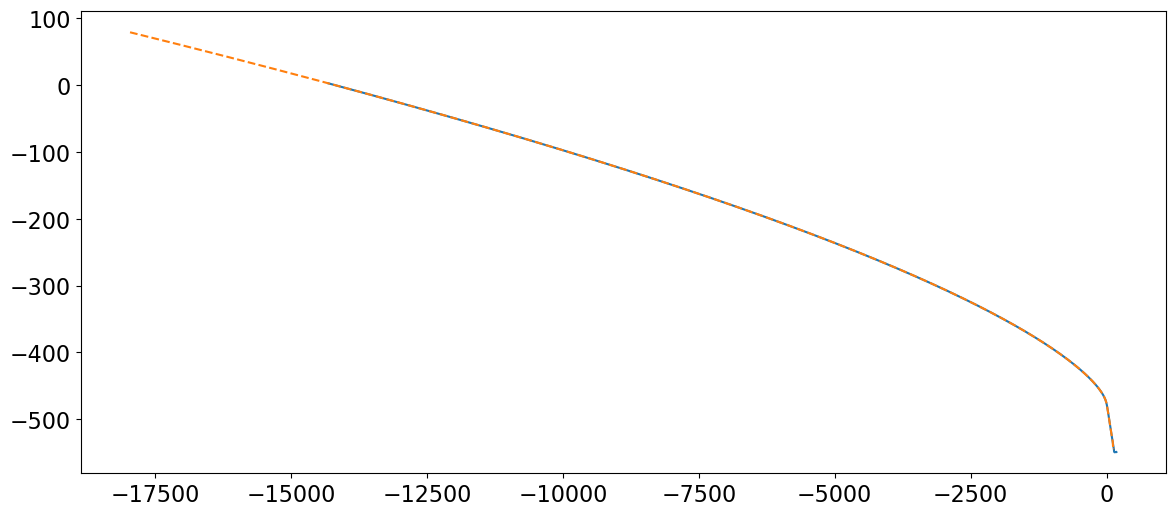

In [847]:
plt.figure(figsize=(14, 6))
plt.plot(wf_sxs['t'], wf_sxs['phase'][2,2])
plt.plot(wf_sur['t'] - result.params['dt'], wf_sur['phase'][2,2] + result.params['dphi']*2 + 2*result.params['dpsi'], ls='--')

# plt.plot(wf_pn['t'] - result.params['dt'], wf_pn['phase'][2,2] + result.params['dphi']*2 + 2*result.params['dpsi'], ls='--')

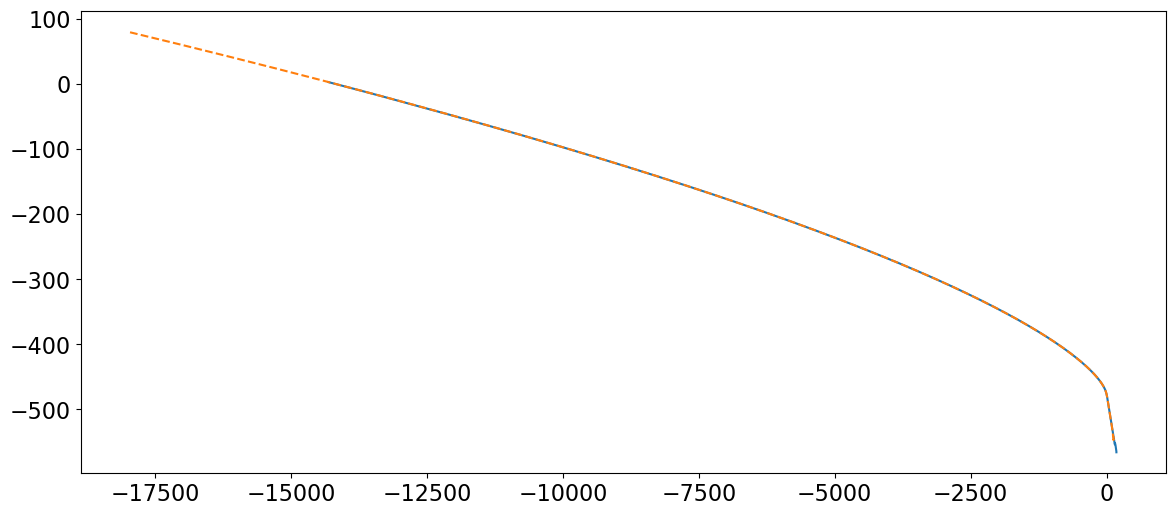

In [848]:
plt.figure(figsize=(14, 6))
plt.plot(wf_sxs['t'], wf_sxs['phase'][3,2])
plt.plot(wf_sur['t'] - result.params['dt'], wf_sur['phase'][3,2] + result.params['dphi']*2 + 2*result.params['dpsi'], ls='--')
# plt.plot(wf_pn['t'] - result.params['dt'], wf_pn['phase'][3,2] + result.params['dphi']*2 + 2*result.params['dpsi'], ls='--')

In [849]:
xx = wf_sxs['t']
ypred_22 = result.eval(params=result.params, x=xx)[:len(xx)]
ypred_32 = result.eval(params=result.params, x=xx)[len(xx):]

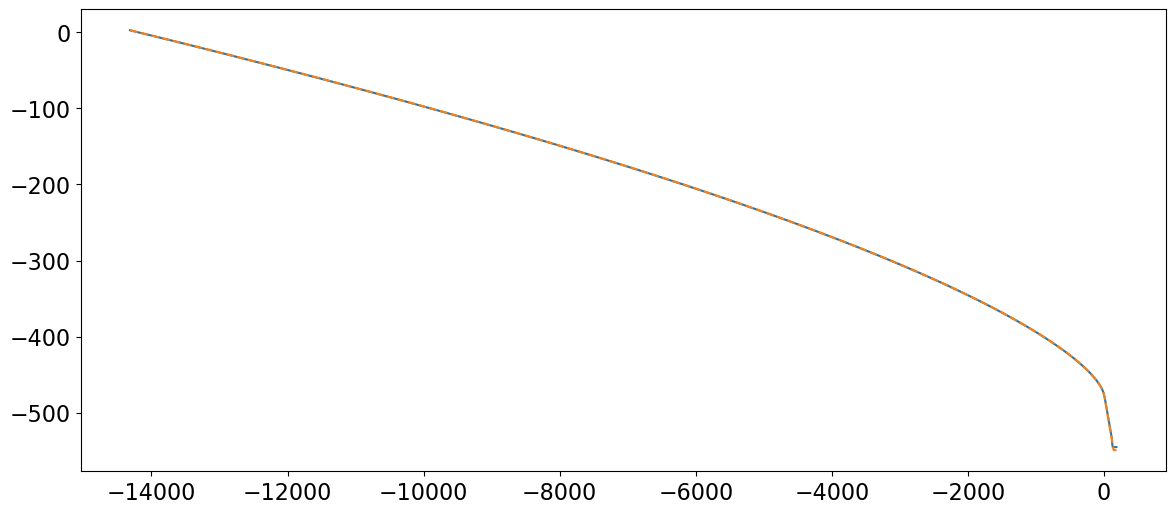

In [850]:
plt.figure(figsize=(14,6))
plt.plot(xx, ypred_22)
plt.plot(wf_sxs['t'], wf_sxs['phase'][2,2], ls='--')

(-1.0, 1.0)

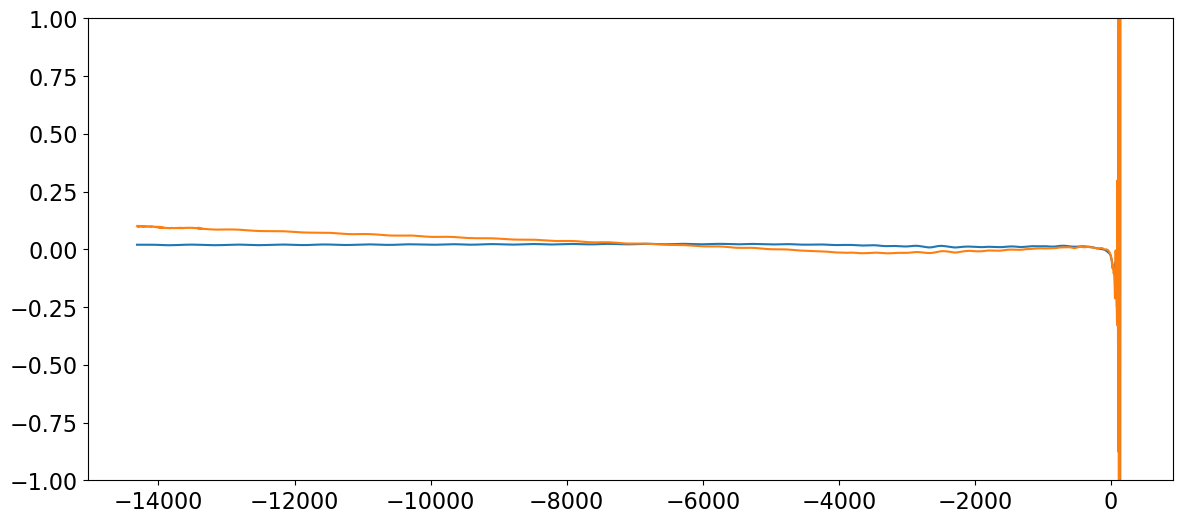

In [851]:
plt.figure(figsize=(14,6))
plt.plot(xx, ypred_22-wf_sxs['phase'][2,2])
plt.plot(xx, ypred_32-wf_sxs['phase'][3,2])
plt.ylim(-1,1)

(-1.0, 1.0)

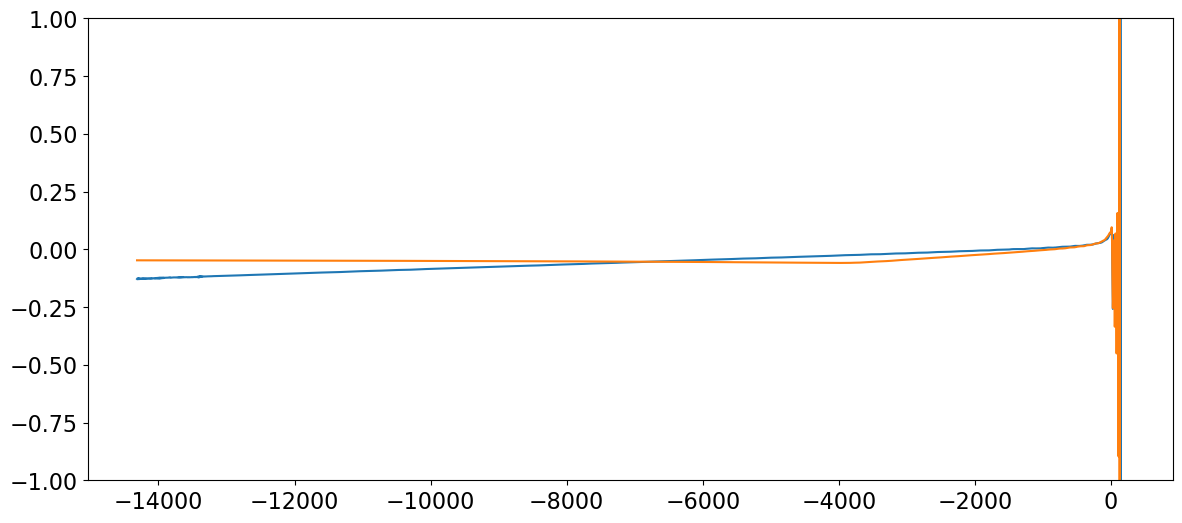

In [852]:
plt.figure(figsize=(14,6))
plt.plot(xx, wf_sxs['phase'][3,2]-wf_sxs['phase'][2,2])
plt.plot(xx, ypred_32-ypred_22)
plt.ylim(-1,1)

(-1.0, 1.0)

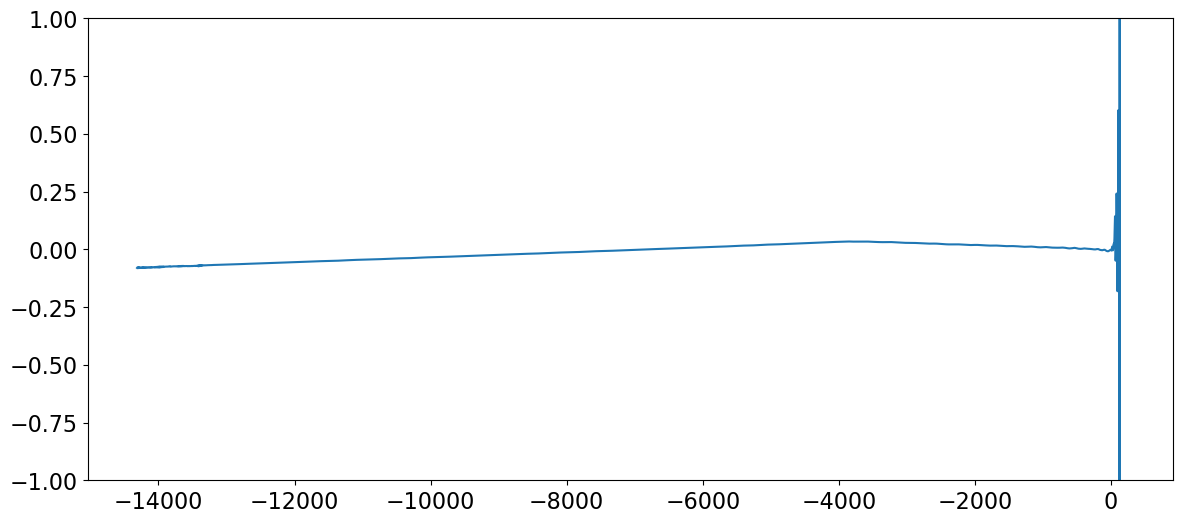

In [853]:
plt.figure(figsize=(14,6))
plt.plot(xx, (wf_sxs['phase'][3,2]-wf_sxs['phase'][2,2]) - (ypred_32-ypred_22))
plt.ylim(-1,1)

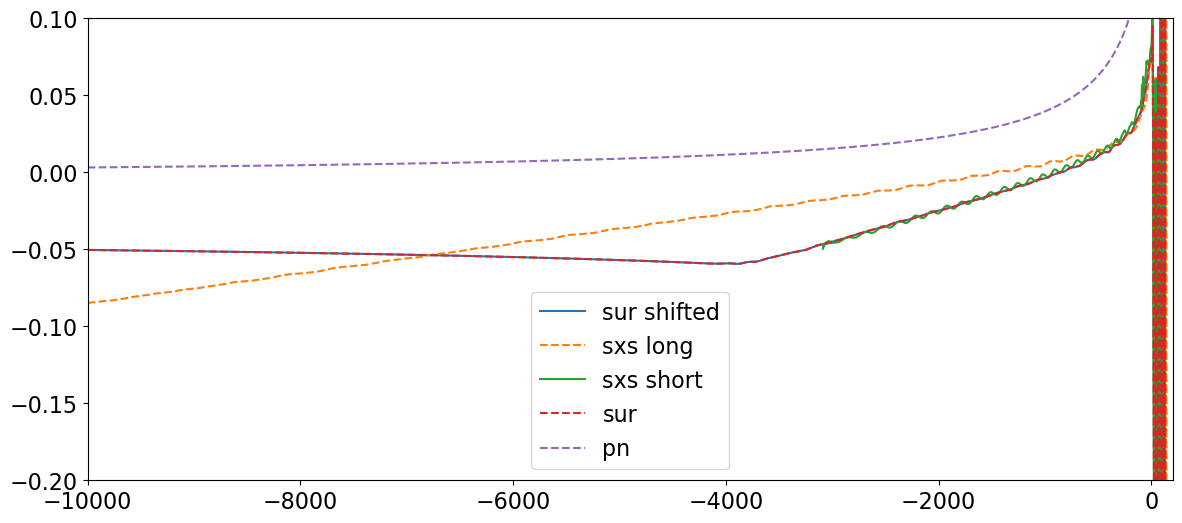

In [867]:
plt.figure(figsize=(14,6), dpi=100)
plt.plot(xx, ypred_32-ypred_22, label='sur shifted')

plt.plot(wf_sxs['t'], wf_sxs['phase'][3,2]-wf_sxs['phase'][2,2], label='sxs long', ls='--')
plt.plot(wf_nr['t'], wf_nr['phase'][3,2]-wf_nr['phase'][2,2], label='sxs short')
plt.plot(wf_sur['t'], wf_sur['phase'][3,2]-wf_sur['phase'][2,2], label='sur', ls='--')
plt.plot(wf_pn['t'], wf_pn['phase'][3,2]-wf_pn['phase'][2,2], label='pn', ls='--')

# plt.ylim(-0.5,0.4)
# plt.xlim(-100, 200)

plt.ylim(-0.2,0.1)
plt.xlim(-10000, 200)
plt.legend()